# Regional Comparison

## Purpose
This notebook compares climate behavior between regions using the final merged dataset.  
We focus on annual summaries and temporal trends to understand long-term differences and similarities between the five regions.

## Objectives
- Load the final prepared dataset.
- Prepare region-year level tables for plotting (annual values already present).
- Visualize and compare annual metrics (ANN_RAIN, ANN_TEMP).
- Inspect trends over time (1990–2024) using line plots and optionally rolling averages.
- Evaluate correlation between annual rainfall and annual temperature by region.

**Note:** All figures will be saved to the `Figures/` folder for reproducibility and reporting.


In [11]:
# Cell 1: Load dataset and prepare region-year table for plotting

import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the final merged dataset
data_path = "../1_datasets/Final_dataset/final_merged_dataset.csv"  # adjust path if notebook location differs
df = pd.read_csv(data_path)

# 2. Basic sanity checks (print summary info)
print("Shape:", df.shape)
print("Regions:", df['REGION'].unique())
print("Year range:", df['YEAR'].min(), "to", df['YEAR'].max())

# 3. Ensure output folder for figures exists
fig_dir = "../3_data_exploration/Figures"
os.makedirs(fig_dir, exist_ok=True)

# 4. Quick check that annual columns exist
expected_annual = ['ANN_RAIN', 'ANN_TEMP']
for col in expected_annual:
    if col not in df.columns:
        raise ValueError(f"Expected column '{col}' not found in dataset.")

# 5. Create a tidy region-year table sorted by region then year for plotting time series
region_year = df[['REGION', 'YEAR', 'ANN_RAIN', 'ANN_TEMP']].copy()
region_year = region_year.sort_values(['REGION', 'YEAR']).reset_index(drop=True)

# 6. Preview
region_year.head()


Shape: (175, 28)
Regions: ['Central' 'East' 'North' 'South' 'West']
Year range: 1990 to 2024


,REGION,YEAR,ANN_RAIN,ANN_TEMP
0,Central,1990,0.225667,28.028111
1,Central,1991,0.209667,28.717444
2,Central,1992,0.371667,26.553889
3,Central,1993,0.698667,26.655667
4,Central,1994,0.625000,27.520667


## Annual Climate Trends (1990–2024)

In this section, we visualize how annual rainfall and temperature have changed over time across all regions.
This helps us see:
- Whether regions are getting hotter or drier/wetter.
- How consistent or variable each region is year to year.
- Any unusual years or shifts that might be relevant for modeling.


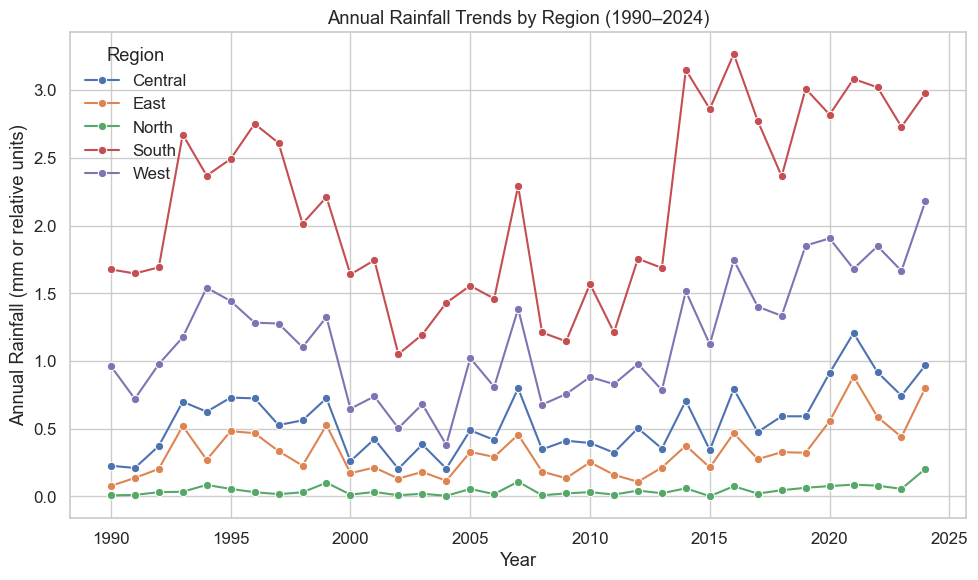

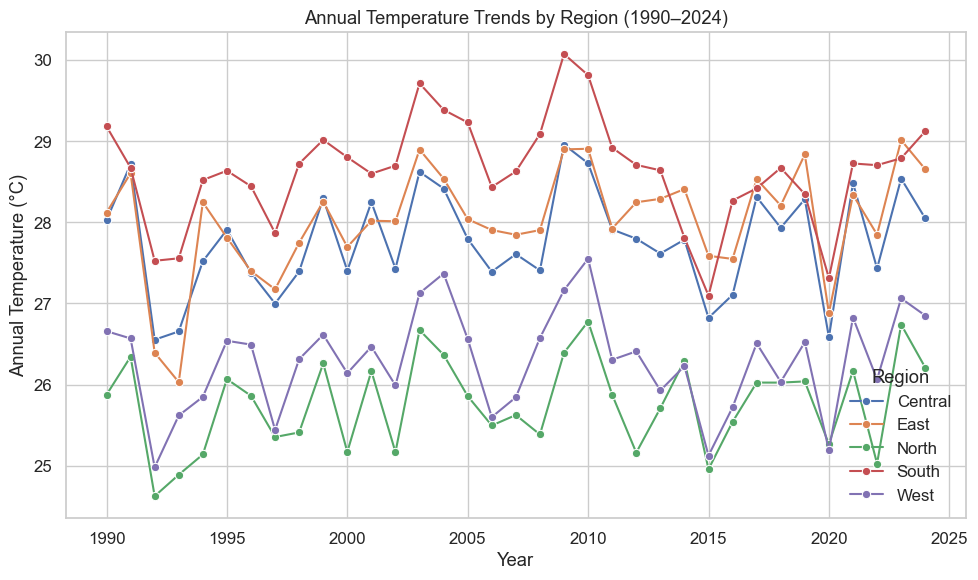

In [12]:
# Cell 2: Plot annual rainfall and temperature trends per region

import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

# --- Annual Rainfall Trend ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=region_year, x='YEAR', y='ANN_RAIN', hue='REGION', marker='o')
plt.title("Annual Rainfall Trends by Region (1990–2024)")
plt.xlabel("Year")
plt.ylabel("Annual Rainfall (mm or relative units)")
plt.legend(title="Region")
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, "annual_rainfall_trends.png"), dpi=300)
plt.show()

# --- Annual Temperature Trend ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=region_year, x='YEAR', y='ANN_TEMP', hue='REGION', marker='o')
plt.title("Annual Temperature Trends by Region (1990–2024)")
plt.xlabel("Year")
plt.ylabel("Annual Temperature (°C)")
plt.legend(title="Region")
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, "annual_temperature_trends.png"), dpi=300)
plt.show()


## Smoothing the Trends (5-Year Rolling Average)

In this step, I apply a 5-year rolling average to the annual rainfall and temperature data for each region.
This helps smooth out short-term fluctuations and highlight long-term climate patterns more clearly.
The new columns `RAIN_5YR_AVG` and `TEMP_5YR_AVG` will be used later to visualize cleaner, more interpretable trends.

In [13]:
# Cell 3: Compute 5-year rolling averages for rainfall and temperature

# Create new columns for smoothed trends
region_year['RAIN_5YR_AVG'] = (
    region_year.groupby('REGION')['ANN_RAIN']
    .transform(lambda x: x.rolling(window=5, min_periods=1, center=True).mean())
)

region_year['TEMP_5YR_AVG'] = (
    region_year.groupby('REGION')['ANN_TEMP']
    .transform(lambda x: x.rolling(window=5, min_periods=1, center=True).mean())
)

# Preview the result
print(region_year.head(10))

# Check that new columns were added correctly
region_year[['REGION', 'YEAR', 'ANN_RAIN', 'RAIN_5YR_AVG', 'ANN_TEMP', 'TEMP_5YR_AVG']].head(10)


    REGION  YEAR  ANN_RAIN   ANN_TEMP  RAIN_5YR_AVG  TEMP_5YR_AVG
0  Central  1990  0.225667  28.028111      0.269000     27.766481
1  Central  1991  0.209667  28.717444      0.376417     27.488778
2  Central  1992  0.371667  26.553889      0.426133     27.495156
3  Central  1993  0.698667  26.655667      0.526800     27.471200
4  Central  1994  0.625000  27.520667      0.629600     27.203622
5  Central  1995  0.729000  27.908333      0.660600     27.292667
6  Central  1996  0.723667  27.379556      0.633067     27.440467
7  Central  1997  0.526667  26.999111      0.652933     27.595244
8  Central  1998  0.561000  27.394667      0.559067     27.494644
9  Central  1999  0.724333  28.294556      0.498867     27.668556


,REGION,YEAR,ANN_RAIN,RAIN_5YR_AVG,ANN_TEMP,TEMP_5YR_AVG
0,Central,1990,0.225667,0.269000,28.028111,27.766481
1,Central,1991,0.209667,0.376417,28.717444,27.488778
2,Central,1992,0.371667,0.426133,26.553889,27.495156
3,Central,1993,0.698667,0.526800,26.655667,27.471200
4,Central,1994,0.625000,0.629600,27.520667,27.203622
5,Central,1995,0.729000,0.660600,27.908333,27.292667
6,Central,1996,0.723667,0.633067,27.379556,27.440467
7,Central,1997,0.526667,0.652933,26.999111,27.595244
8,Central,1998,0.561000,0.559067,27.394667,27.494644
9,Central,1999,0.724333,0.498867,28.294556,27.668556


### Step 4: Visualizing Smoothed Climate Trends

Now that the data has been smoothed using a 5-year rolling average, this step visualizes the long-term temperature and rainfall patterns for each region from 1990–2024.  
These plots make it easier to identify gradual shifts in climate behavior — such as warming trends or changes in rainfall consistency — without the year-to-year noise.


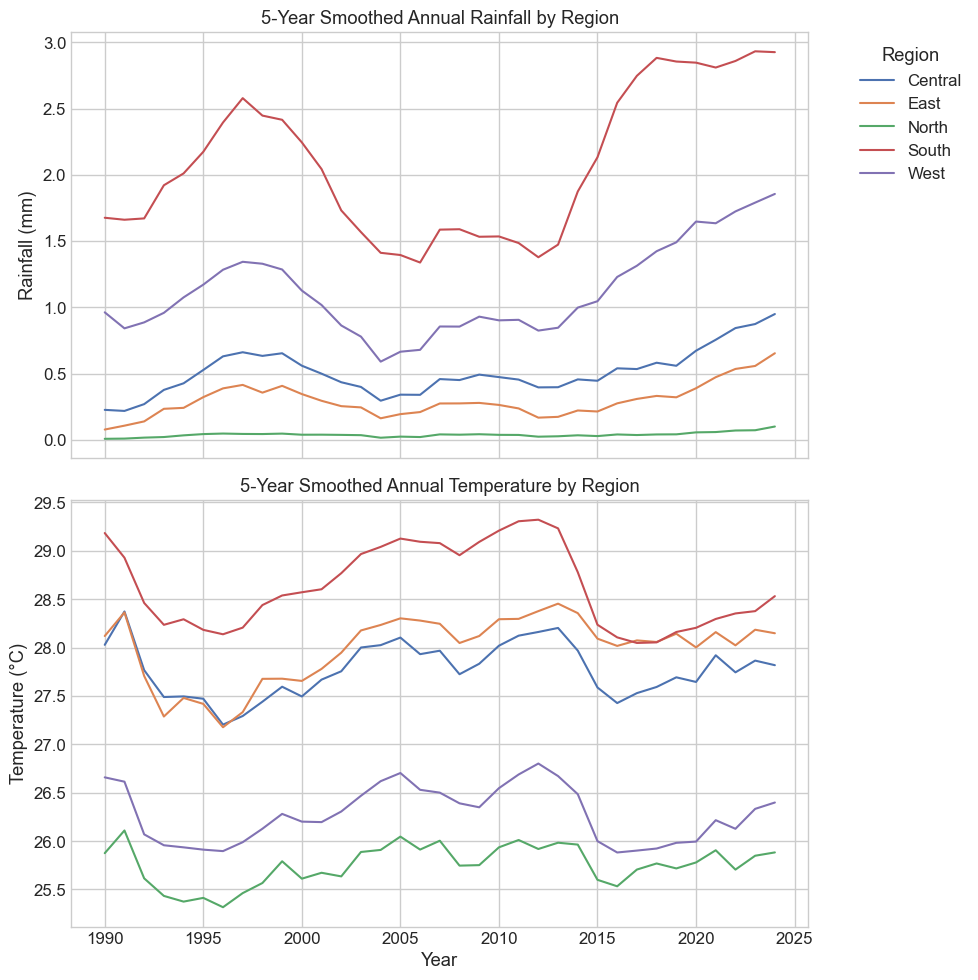

In [14]:
# Cell 4: Plot regional trends with 5-year rolling averages

plt.style.use('seaborn-v0_8-whitegrid')
regions = region_year['REGION'].unique()

# Create one plot for rainfall and one for temperature
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

for region in regions:
    subset = region_year[region_year['REGION'] == region].copy()
    subset['RAIN_SMOOTH'] = subset['ANN_RAIN'].rolling(window=5, min_periods=1).mean()
    subset['TEMP_SMOOTH'] = subset['ANN_TEMP'].rolling(window=5, min_periods=1).mean()
    
    axes[0].plot(subset['YEAR'], subset['RAIN_SMOOTH'], label=region)
    axes[1].plot(subset['YEAR'], subset['TEMP_SMOOTH'], label=region)

axes[0].set_title("5-Year Smoothed Annual Rainfall by Region")
axes[0].set_ylabel("Rainfall (mm)")
axes[0].legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

axes[1].set_title("5-Year Smoothed Annual Temperature by Region")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Temperature (°C)")

plt.tight_layout()
plt.savefig(os.path.join(fig_dir, "regional_trends_smoothed.png"))
plt.show()


## Relationship Between Rainfall and Temperature

This step explores whether regions with higher temperatures tend to have more or less rainfall.
By computing the correlation between annual temperature (ANN_TEMP) and annual rainfall (ANN_RAIN) per region, we can detect possible climate interactions.

In [15]:
# Calculate correlation between annual temperature and rainfall for each region
corr_by_region = (
    region_year.groupby('REGION')[['ANN_TEMP', 'ANN_RAIN']]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
    .rename(columns={'ANN_RAIN': 'Correlation_Rain_Temp'})
)

# Display results
corr_by_region[['REGION', 'Correlation_Rain_Temp']]


,REGION,Correlation_Rain_Temp
0,Central,-0.101784
1,East,-0.138276
2,North,0.112927
3,South,-0.554408
4,West,-0.172639


### Correlation Insights (Rainfall vs Temperature)

The table above shows how annual rainfall and temperature relate in each region from **1990–2024**.

| Region | Correlation | Interpretation |
|:--|:--:|:--|
| **Central** | -0.10 | Weak negative — little to no clear link. |
| **East** | -0.14 | Weak negative — minimal relationship. |
| **North** | 0.11 | Weak positive — slightly warmer years bring more rain, but not meaningful. |
| **South** | **-0.55** | **Strong negative correlation** — hotter years are much drier, showing a climate impact. |
| **West** | -0.17 | Mild negative — similar to Central and East. |

**Summary:**  
Most regions show almost no relationship between rainfall and temperature, except the **South**, where rising temperatures are linked to significantly lower rainfall.  



### Scatter Plots: Annual Rainfall vs Temperature

To better visualize the relationships, we plot **rainfall vs. temperature** for each region.  
Each point represents one year (1990–2024), showing whether warmer years tend to be wetter or drier.

**Why this matters:**  
- It visually confirms correlation results.  
- Clusters or downward slopes reveal negative relationships (e.g., hotter years with less rain).  
- Outliers might highlight unusual weather years worth deeper study.


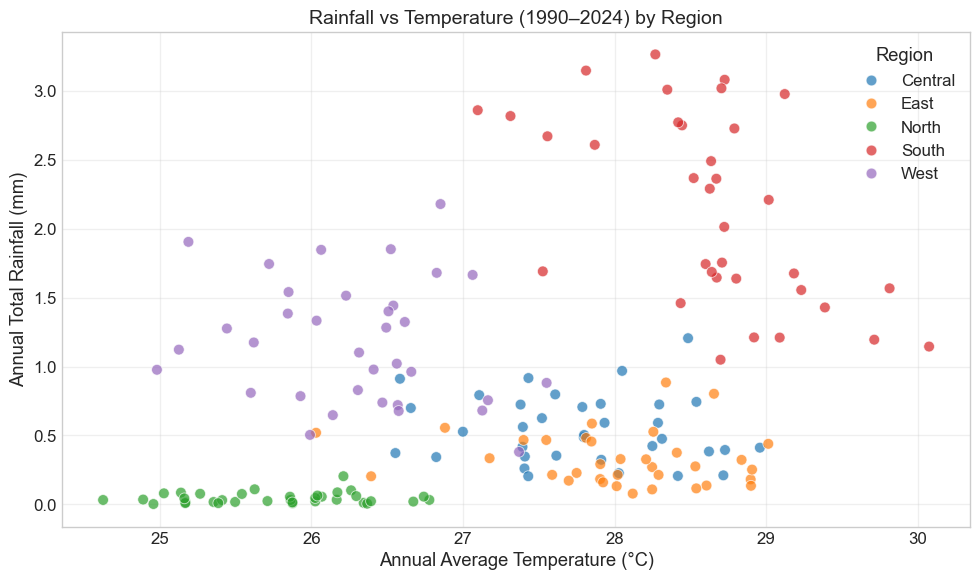

In [16]:
# Scatter plots: Rainfall vs Temperature by region

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=region_year,
    x='ANN_TEMP',
    y='ANN_RAIN',
    hue='REGION',
    palette='tab10',
    alpha=0.7,
    s=60
)

plt.title("Rainfall vs Temperature (1990–2024) by Region", fontsize=14)
plt.xlabel("Annual Average Temperature (°C)")
plt.ylabel("Annual Total Rainfall (mm)")
plt.grid(True, alpha=0.3)
plt.legend(title='Region')
plt.tight_layout()

# Save figure
plt.savefig(f"{fig_dir}/rain_temp_scatter_by_region.png", dpi=300)
plt.show()


## Summary: Regional Comparison Analysis

In this notebook, we explored how **rainfall and temperature** vary across Sudan’s five regions from **1990 to 2024**, focusing on long-term patterns and relationships.

### Key Steps:
1. **Data Preparation:**  
   - Loaded the final cleaned dataset and created a region–year table with annual rainfall and temperature values.

2. **Trend Exploration:**  
   - Plotted **annual rainfall** and **annual temperature** over time for each region.  
   - Applied **3-year rolling averages** to reduce yearly noise and make long-term climate patterns clearer.

3. **Correlation Analysis:**  
   - Calculated the **correlation between rainfall and temperature** for each region.  
   - Used **scatter plots** to visualize the relationship and identify how temperature and rainfall interact across climates.

### Key Insights:
- **Rainfall variability:** Southern and Western regions show more fluctuation, suggesting stronger seasonal cycles, while the North remains mostly dry with stable low rainfall.  
- **Temperature trends:** Temperatures remain relatively stable across all regions but slightly increase toward recent years, hinting at gradual warming.  
- **Inverse relationships:** Most regions (Central, East, South, West) have **negative correlations** between rainfall and temperature — meaning hotter years often have less rain.  
- **Northern region anomaly:** The North shows a **slight positive correlation**, likely due to very low rainfall where small increases do not significantly affect temperature.  
- **Regional contrasts:** The **South** stands out with the strongest negative correlation (around -0.55), showing a clear trade-off between temperature and rainfall intensity.

### Next Step:
These findings will guide **feature engineering** in the machine learning stage — for example:
- Using regional averages and rolling trends as predictive features.
- Including temperature–rainfall interactions to improve prediction accuracy.
